# SIMULACIÓN | LABORATORIO 4


## Generación de número pseudo-aleatorios

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display
import ipywidgets as widgets
import random
import math
from ipywidgets import interact, interactive, fixed, interact_manual

### El módulo Random de python 


**Ejercicio 1:**
- Defina lo que es una semilla y para qué sirve
- use random.random() para generar números aleatorios. 
- use una semilla con random.seed(semilla), y vuelva a ejecutar random.random()
- ¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?



**Resolucion 1:**
- 1.1) Una semilla es un valor utilizado para generar datos al azar. esta semilla nos permitirá generar los mismos valores aleatorios que se generaron anteriormente en ella, lo cual nos podria ser util para reproducir experimentos, entre otras cosas.

- 1.2) 

In [4]:
for i in range(10):
    print(random.random())

0.08837835595722665
0.7860807280629609
0.7644938165929946
0.3569543585407138
0.5036010488255098
0.7979186525949942
0.2640774957148465
0.2589633940216083
0.594064305253562
0.012166222329929366


Al utilizar la función random.random() podemos ver que cada vez que se ejecuta obtenemos nuevos números aleatorios

- 1.3)

In [5]:
random.seed('semilla')
for i in range(10):
    print(random.random())

0.7314614662926701
0.06727664581038872
0.25068246842441855
0.47431915237210553
0.41815564519418935
0.4637029099827057
0.06769978299740442
0.9394007165517057
0.45596120169659304
0.6726790553553693


Al utilizar una semilla podemos ver que cada vez que se ejecuta obtenemos los mismos números aleatorios generados

- 1.4)

In [6]:
random.seed('semilla')
for i in range(10):
    print(random.random())

0.7314614662926701
0.06727664581038872
0.25068246842441855
0.47431915237210553
0.41815564519418935
0.4637029099827057
0.06769978299740442
0.9394007165517057
0.45596120169659304
0.6726790553553693


Si se vuelve a definir la misma semilla, obtendremos los mismos valores obtenidos anteriormente

**Ejercicio 2:**
Pruebe las funciones y defina sus diferencias:

    - random.randint(a, b)
    - random.randrange(a, b)
    - random.uniform(a, b)
    

**Resolucion 2:**


- **randint**


In [7]:
for i in range(10):
    print(random.randint(1, 10))

3
6
2
9
9
5
4
2
10
5


Podemos ver que esta funcion nos devuelve un número random de tipo INT entre a y b

- **randrange**


In [8]:
for i in range(10):
    print(random.randrange(1, 2))
    

1
1
1
1
1
1
1
1
1
1


Esta función nos devuelve un número random de tipo INT entre a y b-1, lo cual podemos ver ya que en el rango definido (1,2) el resultado siempre es 1

- **uniform**


In [9]:
for i in range(10):
    print(random.uniform(1, 10))

6.0156202748972225
5.022315670608207
2.596978043930595
4.331051834493573
6.507845310873946
1.3818312014665917
9.21072224211527
9.129495892442337
3.821866860340753
6.110861604452872


Esta funcion nos devuelve un numero random de tipo FLOAT entre a y b

- **Diferencias**


Podemos observar que **randint** y **randrange** nos devuelve un numero random de tipo **INT**, pero la diferencia entre estos esta en los rangos en que devuelve estos valores. **randint** nos devuelve valores entre a y b, en cambio **randrange** nos devuelve valores entre a y b-1. por otro lado estas funciones se diferencian de **uniform** en sus tipos ya que esta ultima nos arroja valores de tipo **FLOAT**

### Clase NotSoRandom:

In [4]:
class NotSoRandom(object):
    def seed(self, a=3):
        """Seed the world's most mysterious random number generator."""
        self.seedval = a
    def random(self):
        """Look, random numbers!"""
        self.seedval = (self.seedval * 3) % 19
        return self.seedval

_inst = NotSoRandom()
seed = _inst.seed
random = _inst.random


**Ejercicio 3:**
- use la semilla 1234 y genere números aleatorios hasta que se cumpla un ciclo completo. ¿Cuál resultó ser el periodo?
- Intente con otra semilla y busque completar un ciclo. 

**Resolucion 3:**

- 3.1)

In [11]:
def f(x):
    numeros = []
    seed(1234)
    for i in range(x):
        numeros += [random()]
    fig, ax = plt.subplots(1, 1,figsize=(12, 4), dpi=80)
    ax.plot(numeros)
    ax.set_xticks(np.arange(1, 50, 2));

In [12]:
interact(f, x=(0,50));

interactive(children=(IntSlider(value=25, description='x', max=50), Output()), _dom_classes=('widget-interact'…

De esta grafica podemos ver que entre 4 y 22 se cumple un ciclo, por lo que el período de este ciclo es **18**. Dado esto, podemos decir que este generador de números aleatorios no es muy bueno, ya que se llega a la existencia de patrones en un tiempo muy corto.

- 3.2)

In [13]:
def f(x):
    numeros = []
    seed(4321)
    for i in range(x):
        numeros += [random()]
    fig, ax = plt.subplots(1, 1,figsize=(10, 4), dpi=80)
    ax.plot(numeros)
    ax.set_xticks(np.arange(1, 50, 2));

In [14]:
interact(f, x=(0,50));

interactive(children=(IntSlider(value=25, description='x', max=50), Output()), _dom_classes=('widget-interact'…

De este gráfico podemos ver que el primer ciclo empieza en 3 y termina en 21, por lo que el período de los ciclos al cambiar la semilla sigue siendo **18**. A partir de esto, podemos decir que el generador de números aleatorios sigue siendo malo independiente de la semilla que se escoja.

#### **Ejercicio 4:**
En este ejercicio vamos a comparar el generador de la biblioteca Random de Python con el generador de números pseudo-aleatorios congruencial lineal descrito en la sesión téórica. Para ello se pide lo siguiente:
1. Programe el generador de números pseudo-aleatorios congruencial lineal 
2. Extraiga secuencias del generador programado y del predefinido en Python, grafique en histogramas, compare y concluya.


**Resolucion 4:**

- **4.1)**

**LCG**

In [15]:
def lcg(a,c,m,x0,n):
    numeros = []
    for i in range(n):
        x0 = (a*x0 +c) % m
        numeros += [x0 / m]
    return numeros
def seedLcg(valor_inicial):
    x0 = valor_inicial
    return x0

In [16]:
semilla = seedLcg(1)
lcg(16807,0,2147483647,semilla,10) # donde lcg(alfa,c,modulo,semilla,numero de iteraciones)

[7.826369259425611e-06,
 0.13153778814316625,
 0.7556053221950332,
 0.4586501319234493,
 0.5327672374121692,
 0.21895918632809036,
 0.04704461621448613,
 0.678864716868319,
 0.6792964058366122,
 0.9346928959408276]

- **4.2)**

**Extraccion de secuencia del lcg**

In [17]:
semilla = seedLcg(1)
lcg_extract = lcg(16807,0,2147483647,semilla,1000000)

**Extraccion del generador predefinido en python**

In [20]:
gpython_extract = []
for i in range(1000000):
    gpython_extract += [random.random()]

(array([ 99989.,  99942.,  99896.,  99710., 100008., 100559., 100428.,
         99877.,  99876.,  99715.]),
 array([4.67058271e-07, 1.00000415e-01, 2.00000363e-01, 3.00000311e-01,
        4.00000259e-01, 5.00000207e-01, 6.00000154e-01, 7.00000102e-01,
        8.00000050e-01, 8.99999998e-01, 9.99999946e-01]),
 <BarContainer object of 10 artists>)

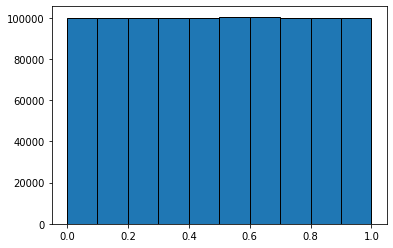

In [21]:
plt.hist(lcg_extract,edgecolor = 'black')

(array([100030., 100335., 100197.,  99754.,  99722.,  99194., 100302.,
         99957., 100526.,  99983.]),
 array([6.01024804e-08, 1.00000052e-01, 2.00000044e-01, 3.00000036e-01,
        4.00000028e-01, 5.00000020e-01, 6.00000012e-01, 7.00000004e-01,
        7.99999996e-01, 8.99999988e-01, 9.99999980e-01]),
 <BarContainer object of 10 artists>)

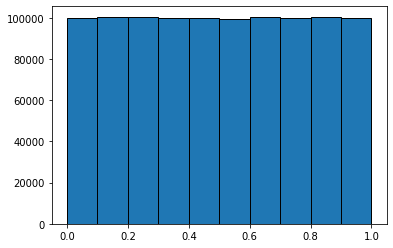

In [22]:
plt.hist(gpython_extract, edgecolor = 'black')


Como podemos ver el grafico del LCG con los respectivos valores de a,m,c utilizados anteriormente, tenderá a obtener la misma probabilidad en cada intervalo, lo cual esto es muy bueno ya que la entropía del LCG sería máxima. Al ocurrir esto tenemos la certeza de que los valores escogidos serán aleatoriamente mejor, por lo cual no se ocasionarían los ciclos que se vieron en el item anterior.

Por otro lado el generador de números aleatorios de python igual tiende a conseguir la entropía máxima, pero esta se conseguiría con una secuencia mucho mas grande que con LCG.

#### **Ejercicio 5:**
Escoja una distribución de probabilidad continua.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2) utilizando el test de k-s

Para realizar este análisis se ocupará una distribución exponencial

**Respuesta 5.1**

Sea la funcion de ditribucion exponencial : $1-e^{-\lambda  x}$

In [23]:
def secuencia_expo(n):
    secuencia_py = []
    for i in range(n):
        secuencia_py += [random.expovariate(0.1)] # distribucion exponencial
    return secuencia_py

In [24]:
secuencia_expo(1000)

[1.124788144702925,
 3.968030142817889,
 1.446567114190674,
 3.5976614445334576,
 8.920439810312605,
 1.8924319808868544,
 18.034858073017826,
 13.271631964972572,
 6.646448494693931,
 8.095341107714328,
 6.71497941412684,
 22.530253332666245,
 1.9743277440707034,
 1.3656524123561027,
 8.90276042492406,
 18.85232801952995,
 6.645463977618602,
 3.1795883347910503,
 2.870334032170939,
 41.23044307097668,
 2.4445240669821495,
 5.001331294644255,
 16.984075792234805,
 31.62518100124217,
 46.30405834107847,
 5.196254562972271,
 11.730747927728599,
 39.7112339238088,
 18.36536044854123,
 5.4533347056415415,
 20.343060796473264,
 17.524723028324555,
 7.940461185830237,
 0.5374526760274639,
 9.830653539613213,
 25.327820839870256,
 16.733650097331864,
 5.597872163727803,
 8.20511278714549,
 11.135294405532926,
 25.978166958562,
 3.0778535851044824,
 9.271049357332016,
 14.928006619720437,
 4.2130596492005,
 11.546679935835051,
 3.63377699916461,
 17.19153062220808,
 27.590462016349473,
 0.7136

**Respuesta 5.2**

Sea la funcion de ditribucion exponencial : $1-e^{-\lambda  x}$

entonces $R = 1-e^{-\lambda x}$    , donde R es un numero random entre 0 y 1

$e^{-\lambda x} = 1-R$

$-\lambda x = ln(1 - R)$

$ x = -ln(1 - R) / \lambda $  , formula de transformada inversa

In [25]:
def transformada_inversa_expo(n):
    lambd = 0.1
    secuencia_ti = []
    for i in range(n):
        R = random.random()
        secuencia_ti += [(-math.log(1-R))/lambd]
    return secuencia_ti

In [26]:
transformada_inversa_expo(1000)

[5.040491768835494,
 17.0660313984622,
 7.322083164158083,
 1.4920184067834257,
 4.44770299884189,
 2.9270796754454285,
 33.017700241076525,
 8.428564934601775,
 24.910296303223593,
 0.20700075289038203,
 17.22270081975389,
 6.900747657637718,
 4.3568006262622765,
 9.176232387679837,
 5.235240001666908,
 5.028819387409813,
 6.202346429960298,
 0.11435378724110525,
 29.901120994414576,
 10.742315712424855,
 1.8045415763343065,
 16.124163675455264,
 9.616253559250763,
 4.81223235495666,
 14.59533049957475,
 3.2570484663476926,
 14.098814223027016,
 10.694934830458585,
 9.007538318797902,
 0.5769409736414808,
 12.115066305931261,
 9.691491197850043,
 38.9164917394128,
 12.573403218159926,
 24.948676561289663,
 2.477010736089995,
 7.281897936920863,
 3.8879249104908524,
 15.798520379782795,
 0.2034450887489323,
 5.569519652984343,
 7.233375006053089,
 9.381226116907197,
 29.715175366512145,
 0.7869437143638098,
 1.547538948657862,
 7.346211743613223,
 2.474800563197328,
 5.525766417092664,

**Respuesta 5.3**

In [35]:
def f(n):
    secuencia_py = secuencia_expo(n)
    t_inv_exp = transformada_inversa_expo(n)
    fig, ax = plt.subplots(1, 2,figsize=(10, 4), dpi=80)
    ax[0].hist(secuencia_py)
    ax[1].hist(t_inv_exp)
    print('kstest random exp python: ',scipy.stats.kstest(secuencia_py, 'expon'))
    print('kstest random exp transformada inversa: ',scipy.stats.kstest(t_inv_exp, 'expon'))
    print('ktest comparando secuencia 1 y 2: ', scipy.stats.kstest(secuencia_py, t_inv_exp))

In [36]:
interact(f, n=(100,1000));

interactive(children=(IntSlider(value=550, description='n', max=1000, min=100), Output()), _dom_classes=('widg…

A primera vista, los histogramas nos indican que las secuencias generadas podrían corresponder a una distribución exponencial, lo cual no coincide con los resultados de los kstest que vemos a continuación.

El primer kstest nos dice que secuencia_py no corresponde a una distribución exponencial, ya que el pvalue es un valor demasiado cercano a 0. (pvalue=5.217428054218113e-286)

El segundo kstest, al igual que el primero, nos dice que t_inv_exp tampoco corresponde a una distribución exponencial, ya que el pvalue también es muy cercano a 0. (pvalue=1.4734835093553797e-275)

El último kstest, donde se comparan ambas secuencias, nos indica que se acepta la hipótesis de que la secuencia 1 corresponde a la distribución correspondiente a la segunda secuencia, pero a partir de los primeros kstest podemos decir que ninguna es exponencial. (pvalue=0.5218065770654791)

#### **Ejercicio 6:**
Escoja una distribución de probabilidad discreta.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2). ¿Qué test sería adecuado utilizar en este caso?

**Respuesta 6.1**

In [37]:
def geom_python(n):
    a = np.random.geometric(0.5,n)
    return a


In [38]:
geom_python(10)

array([2, 1, 2, 1, 1, 3, 2, 1, 1, 3])

**Respuesta 6.2**

sea la función de distribución geométrica : $f(x) = (1-p)^{(x-1)}p$

entonces $R = (1-p)^{x-1}p$ , con R un número random entre 0 y 1

$R/p = (1-p) ^{x-1}$

$log_{1-p}(R/p) = x-1$

$x = log_{1-p}(R/p) + 1 $

In [39]:
def ti_geom(n):
    p = 0.5
    secuencia_ti = []
    for i in range(n):
        R = random.random()
        secuencia_ti += [math.log((R/p),1-p)+1]
    return secuencia_ti

In [40]:
ti_geom(10)

[4.008982575280747,
 2.112622670756682,
 0.050573230410283165,
 1.084911694859236,
 5.154813840874167,
 1.3936193779611528,
 0.8633348805221479,
 1.130237173794204,
 0.03679393048692792,
 0.9936597317654327]

**Respuesta 6.3**

In [62]:
def y(x):
    geom_py= geom_python(x)
    ti = ti_geom(x)
    fig, ax = plt.subplots(1, 2,figsize=(10, 4), dpi=80)
    ax[0].hist(geom_py)
    ax[1].hist(ti)

In [64]:
interact(y, x=(100,1000));

interactive(children=(IntSlider(value=550, description='x', max=1000, min=100), Output()), _dom_classes=('widg…

A partir de los histogramas no podemos afirmar si ambas secuencias provienen de la misma distribución, puesto que estos no son determinantes en este sentido

Ya que la distribución geométrica es discreta, un test de bondad adecuado puede ser el chi-cuadrado, el cual funciona evaluando las frecuencias observadas y las esperadas.

**Referencias:**
    
- Generating Random Data in Python (Guide): https://realpython.com/python-random/

- Generación de números pseudo-aleatorios: https://www.youtube.com/watch?v=C82JyCmtKWg